In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys

Using TensorFlow backend.


In [2]:
tf.__version__

'1.15.4'

In [3]:
# Importing the dataset
train = pd.read_csv('./Data/train.csv')
test = pd.read_csv('./Data/test.csv')

In [4]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

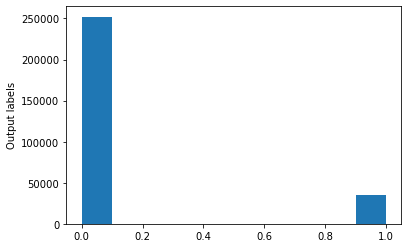

In [5]:
plt.hist(y_train)
plt.ylabel('Output labels')
plt.show()

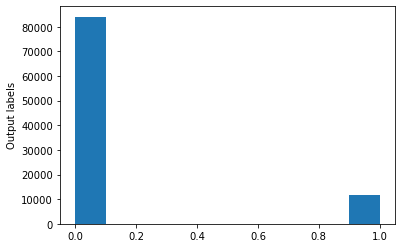

In [6]:
plt.hist(y_test)
plt.ylabel('Output labels')
plt.show()

### Architecture
- 8 neurons in the first layer
- 4 neurons in the second layer
- 1 neuron in the output layer

In [36]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(196, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(98, activation='relu'))
model.add(Dense(49, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 196)               19404     
_________________________________________________________________
dense_4 (Dense)              (None, 98)                19306     
_________________________________________________________________
dense_5 (Dense)              (None, 49)                4851      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 50        
Total params: 43,611
Trainable params: 43,611
Non-trainable params: 0
_________________________________________________________________
None


In [39]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', 'mse'])

In [40]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'NN_best_model.hdf5', monitor='val_loss', save_best_only=True, save_weights_only=True)
callback_b = EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)

In [42]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, callbacks=[callback_a,callback_b])

Train on 286940 samples, validate on 95647 samples
Epoch 1/100
286940/286940 [==============================] - 7s 24us/sample - loss: 0.0441 - acc: 0.9849 - mean_squared_error: 0.0125 - val_loss: 0.0458 - val_acc: 0.9849 - val_mean_squared_error: 0.0128
Epoch 2/100
286940/286940 [==============================] - 8s 29us/sample - loss: 0.0439 - acc: 0.9850 - mean_squared_error: 0.0124 - val_loss: 0.0460 - val_acc: 0.9847 - val_mean_squared_error: 0.0128
Epoch 3/100
286940/286940 [==============================] - 6s 22us/sample - loss: 0.0437 - acc: 0.9850 - mean_squared_error: 0.0124 - val_loss: 0.0460 - val_acc: 0.9847 - val_mean_squared_error: 0.0128
Epoch 4/100
286940/286940 [==============================] - 8s 28us/sample - loss: 0.0435 - acc: 0.9851 - mean_squared_error: 0.0123 - val_loss: 0.0460 - val_acc: 0.9847 - val_mean_squared_error: 0.0128
Epoch 5/100
286940/286940 [==============================] - 8s 27us/sample - loss: 0.0432 - acc: 0.9852 - mean_squared_error: 0.0123

### Check the learning curve

In [43]:
print(history.params)

{'batch_size': 200, 'epochs': 100, 'steps': None, 'samples': 286940, 'verbose': 0, 'do_validation': True, 'metrics': ['loss', 'acc', 'mean_squared_error', 'val_loss', 'val_acc', 'val_mean_squared_error']}


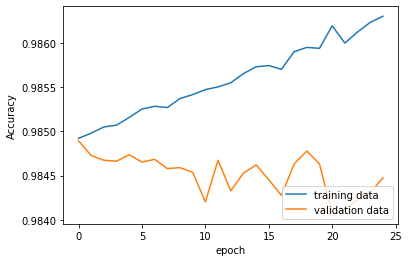

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt.show()

### Load model

In [23]:
model.load_weights('NN_best_model.hdf5')

### Evaluate the model on the training data

Yes the same data we used to train the model

In [45]:
scores = model.evaluate(X_train, y_train)
print(model.metrics_names)
print(scores)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

286940/286940 [==============================] - 9s 32us/sample - loss: 0.0362 - acc: 0.9866 - mean_squared_error: 0.0105
['loss', 'acc', 'mean_squared_error']
[0.03619969896822335, 0.9866383, 0.01054636]

acc: 98.66%


### Evalutate the model on test set
- this is the real test for the model
- we will evaluate the model on the 'Unknown' dataset (i.e. test dataset) 

In [46]:
scores = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(scores)
print('\n%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

95647/95647 [==============================] - 3s 32us/sample - loss: 0.0519 - acc: 0.9845 - mean_squared_error: 0.0131
['loss', 'acc', 'mean_squared_error']
[0.051891396857084354, 0.9844742, 0.013144804]

acc: 98.45%


### Check what the model actually predicts

In [29]:
# print(X_test[100:105])
print(y_test[100:105])

100    0
101    0
102    0
103    1
104    0
Name: FraudFound, dtype: int64


In [47]:
prediction = model.predict(X_test)

In [48]:
print(prediction[100:105].round())

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


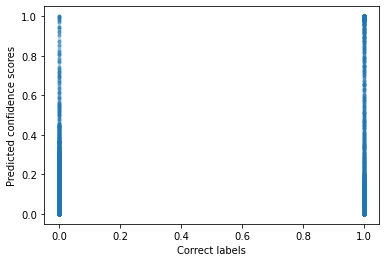

In [49]:
plt.plot(y_test, prediction, '.', alpha=0.2)
plt.xlabel('Correct labels')
plt.ylabel('Predicted confidence scores')
plt.show()

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy=accuracy_score(y_test, prediction.round())
precision=precision_score(y_test, prediction.round())
recall=recall_score(y_test, prediction.round())
f1score=f1_score(y_test, prediction.round())
print('Accuracy: %.2f%%' % (accuracy * 100))
print('Precision: %.2f%%' % (precision * 100))
print('Recall: %.2f%%' % (recall * 100))
print('F1-score: %.2f%%' % (f1score * 100))

Accuracy: 98.45%
Precision: 98.29%
Recall: 88.75%
F1-score: 93.28%


In [18]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
model.predict(X_test).round()

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

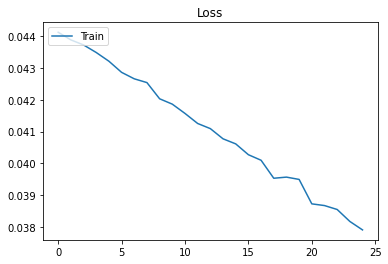

In [52]:
loss_curve=history.history['loss']
acc_curve=history.history['acc']

plt.plot(loss_curve, label='Train')
plt.legend(loc='upper left')
plt.title('Loss')
plt.show()

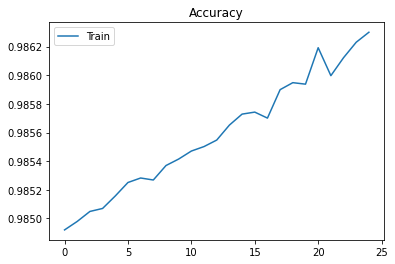

In [53]:
plt.plot(acc_curve, label='Train')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.show()